# Brownian Motion

**Definition:** A stochastic process $X(t), t \geq 0$ is said to be a *Brownian motion* with drift parameter $\mu$ and variance parameter $\sigma^2$ if the following hold:

(a) $X(0)$ is a given constant.

(b) For all positive $y$ and $t$, the random variable $X(t+y) - X(y)$ is independent of the process values up to time $y$ and has a normal distribution with mean $\mu t$ and variance $t \sigma^2$.

We interpret the variable $t$ as time. Property b) says that future increments are normally distributed and do not depend on previous values. Brownian motion, originally used to describe the random motion of particles suspended in a medium, can also be used to model stock price movements. Having a model for stock prices is especially useful when pricing derivative products. We would like a model for how the price of the underlying asset moves in order to assign an arbitrage-free price to the derivative. Brownian motion can be approximated by the limit of a simple random walk, which is convenient for computational modeling.

The idea behind the approximation is as follows: given a small increment of time $\Delta$, we have a process that increases by $\sigma \sqrt{\Delta}$ with probability $p$ and decreases by $\sigma \sqrt{\Delta}$ with probability $1-p$, where $p = \frac{1}{2} (1 + \frac{\mu}{\sigma} \sqrt{\Delta})$. As $\Delta$ gets smaller and smaller, the changes occur more frequently, and the process converges to a Brownian motion with drift parameter $\mu$ and variance parameter $\sigma^2$. Details as to why this is true is can be found in [1].

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [2]:
def Brownian_Motion(mu, sigma, delta, c): # c is our initial value X(0)
    
    p = 0.5 * (1 + (mu/sigma)*delta**0.5)
    
    steps = int(1/delta)
    
    values = np.array([c])
    
    walks = np.random.binomial(1, p, steps) # Each step X_i is Bernoulli(p)
    
    i=1
    
    for walk in walks: # Increment or decrement by sigma*sqrt(delta) depending on the outcome of each step
        if walk == 1:
            values = np.append(values, ([values[i-1] + sigma * delta**0.5]))
        else:
            values = np.append(values, ([values[i-1] - sigma * delta**0.5]))
        i+=1
        
    plt.plot(values)

    plt.xlabel("Time")
    plt.ylabel("Price")

    plt.title("(Approximate) Brownian motion with mu = " + str(mu) + ", sigma = " + str(sigma) + ", delta = " + str(delta))

    plt.show() # Plot the result and return nothing

Here are some plots with different input values. Notice what happens to the graphs as $\Delta$ gets smaller: we go from a discrete time process to something that closely resembles a continuous one.

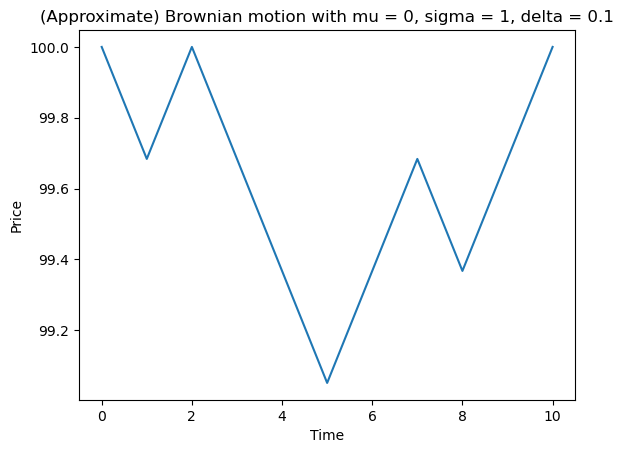

In [3]:
Brownian_Motion(0, 1, 0.1, 100);

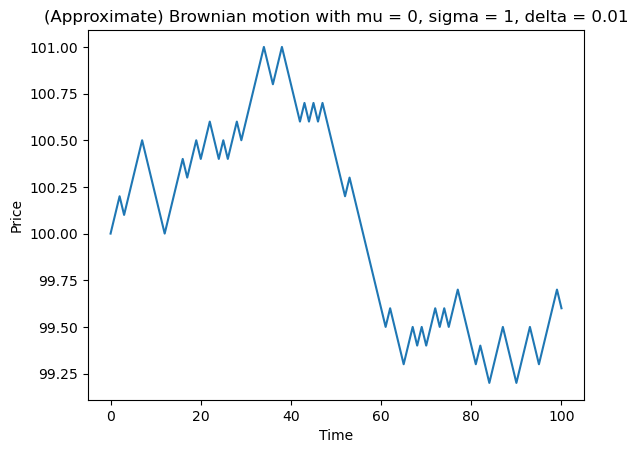

In [4]:
Brownian_Motion(0, 1, 0.01, 100);

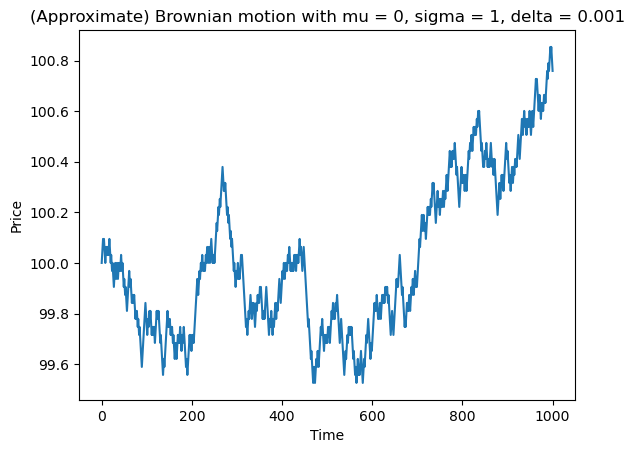

In [5]:
Brownian_Motion(0, 1, 0.001, 100);

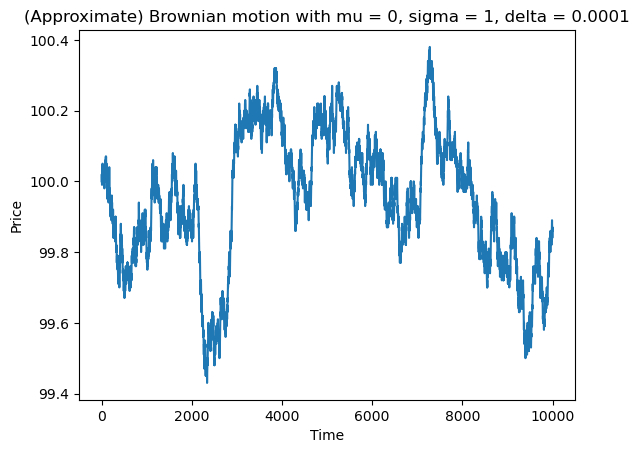

In [6]:
Brownian_Motion(0, 1, 0.0001, 100);

Here are some plots with different values of $\mu$ and $\sigma$:

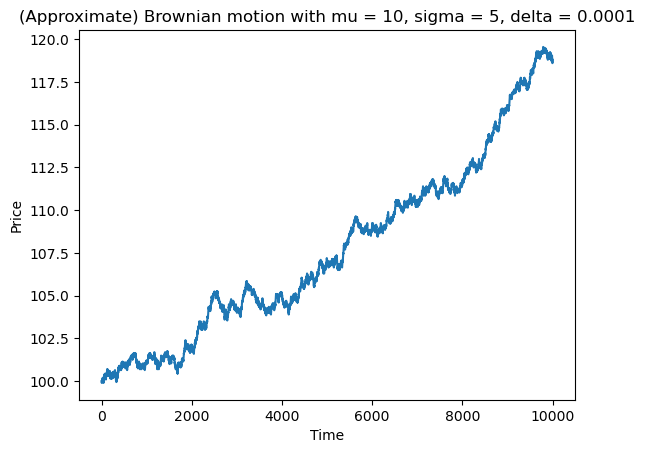

In [7]:
Brownian_Motion(10, 5, 0.0001, 100);

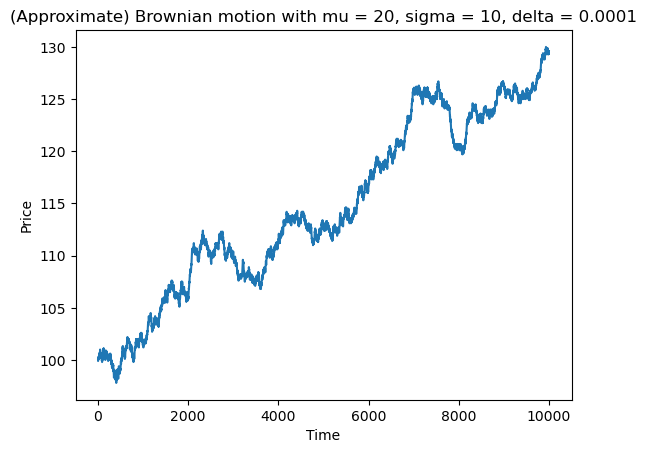

In [8]:
Brownian_Motion(20, 10, 0.0001, 100);

Brownian motion has some interesting properties: the function $t \mapsto X(t)$ can be shown to be (with probability 1) a continuous function of $t$ yet nowhere differentiable.
    
Without delving too deep into the mathematics, we can already see this in the plot above: the curve appears unbroken (continuous) and very "jagged" (nowhere differentiable).

# Geometric Brownian Motion

There are two major flaws with the Brownian motion model for stock prices:

1) Under this model, stock prices can theoretically be negative. Even if we pick our initial value X(0) to be high, there is still a nonzero probability the price dips below 0.

2) Assumption b) implies that **differences** in price over a fixed interval have the same normal distribution no matter what the price at the beginning of the interval was. In simple terms, the probability that a stock worth \\$20 drops to \\$15 in a month is the same as the probability a \\$10 stock drops to \\$5 in a month. In the real world this is preposterous: a 50% loss should not be as likely as a 25% loss.

We remedy this by defining a process $S(t) = e^{X(t)}, t \geq 0$, where $X(t)$ is a Brownian motion. This remedies the issues above:

1) $S(t)$ is non-negative for any value of $X(t)$.

2) We have that $X(t+y) - X(y) = \log(S(t+y)) - \log(S(y)) = \log \big( \frac{S(t+y)}{S(y)} \big)$ is normally distributed for all values of $t, y$. In other words, we have that price **ratios** instead of prices **differences** have the same distribution, which more closely resembles our observed behavior of markets.

We call $S(t)$ a **geometric Brownian motion**, and here it is common to call $\sigma$ the **volatility** parameter.

In [9]:
def Geometric_Brownian_Motion(mu, sigma, delta, c): # c is our initial value X(0)
    
    p = 0.5 * (1 + (mu/sigma)*delta**0.5)
    
    steps = int(1/delta)
    
    values = np.array([c]) # X(0) = c
    
    walks = np.random.binomial(1, p, steps) # Each step X_i is Bernoulli(p)
    
    i=1
    
    for walk in walks: # Increment or decrement by sigma*sqrt(delta) depending on the outcome of each step
        if walk == 1:
            values = np.append(values, ([values[i-1] + sigma * delta**0.5]))
        else:
            values = np.append(values, ([values[i-1] - sigma * delta**0.5]))
        i+=1
        
    plt.plot(values, label = 'Brownian motion')
    plt.plot(math.e**values, label = 'geometric Brownian motion')

    plt.xlabel("Time")
    plt.ylabel("Price")

    plt.title("Comparing Brownian motion with mu = " + str(mu) + ", sigma = " + str(sigma) + ", delta = " + str(delta))

    plt.legend()
    plt.show() # Plot the result and return nothing

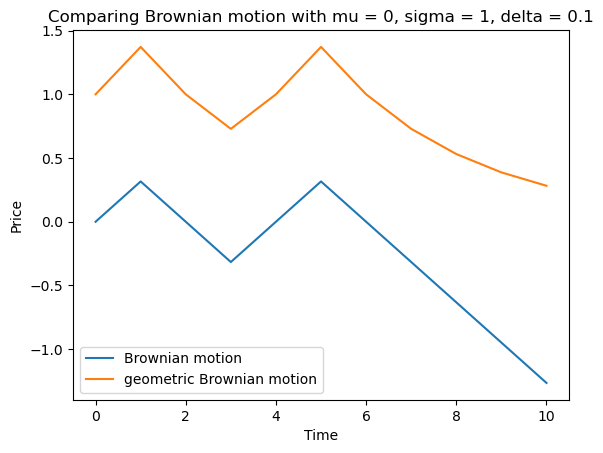

In [10]:
Geometric_Brownian_Motion(0, 1, 0.1, 0)

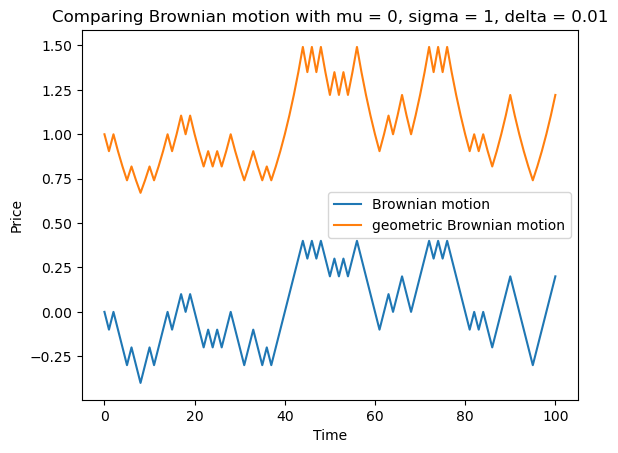

In [11]:
Geometric_Brownian_Motion(0, 1, 0.01, 0);

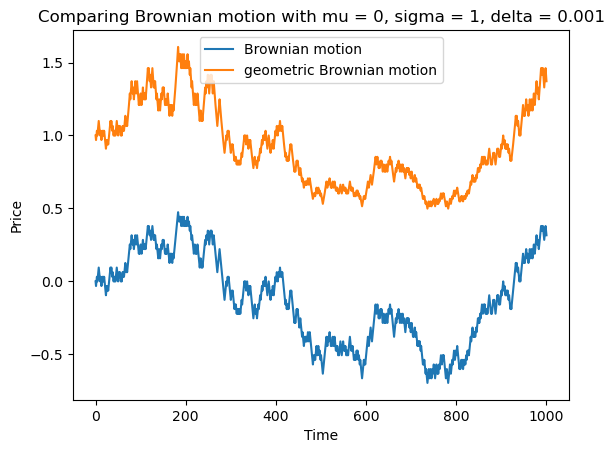

In [12]:
Geometric_Brownian_Motion(0, 1, 0.001, 0);

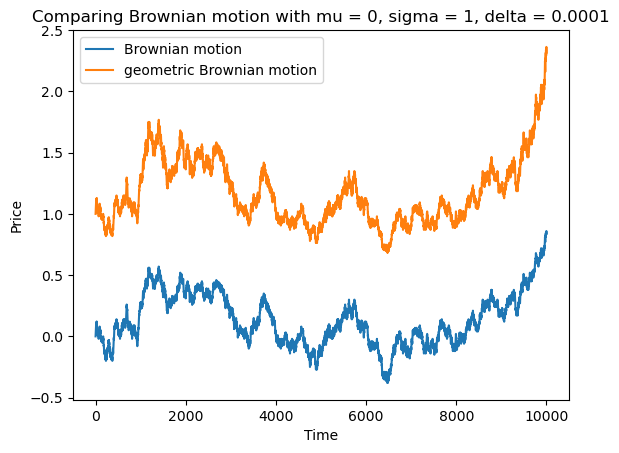

In [13]:
Geometric_Brownian_Motion(0, 1, 0.0001, 0);

Here are some plots with different values of $\mu$ and $\sigma$:

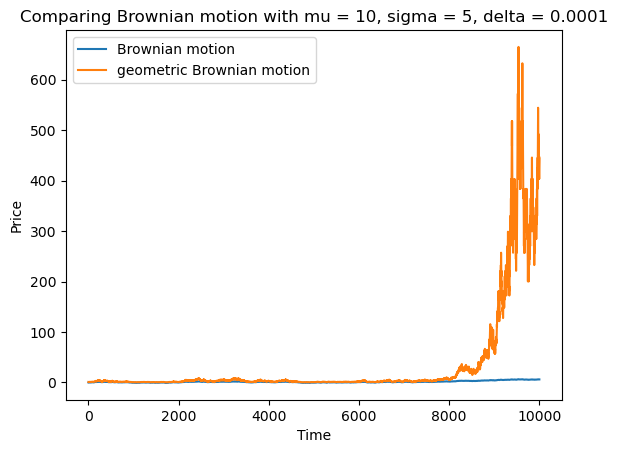

In [14]:
Geometric_Brownian_Motion(10, 5, 0.0001, 0)

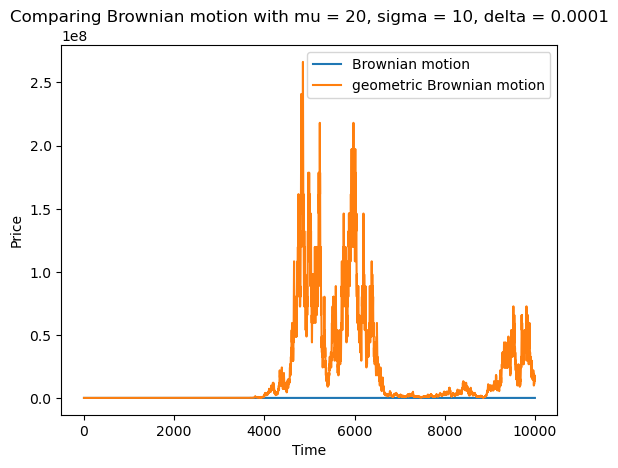

In [15]:
Geometric_Brownian_Motion(20, 10, 0.0001, 0);

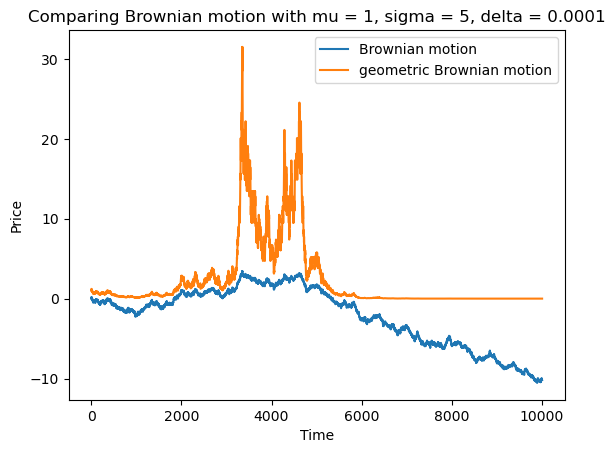

In [16]:
Geometric_Brownian_Motion(1, 5, 0.0001, 0);

Notice how sensitive this model is to changes in the parameters $\mu$, $\sigma$ compared to our previous model. Notice also how the prices are non-negative but get close to $0$ when the values of $X(t)$ are large and negative.

Geometric Brownian motion has numerous applications in finance. The famous Black-Scholes-Merton model assumes the underlying asset follows a geometric Brownian motion where the parameters $\mu$ and $\sigma$ come from market data.

Geometric Brownian motion comes with its own set of flaws. One criticism is that geometric Brownian motion assumes volatility ($\sigma$) remains constant over time, which is generally not the case with real-world stock prices. Nonetheless, geometric Brownian motion is a pivotal tool in modern financial theory.

# References

[1] Sheldon M. Ross, An Elementary Introduction to Mathematical Finance, Cambridge University Press, 2011, New York.